# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

from scipy.stats import sem
import numpy as np
# Import dependencies

from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata,on="Mouse ID",how='left')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [115]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [117]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups =merged_df.loc[merged_df[["Mouse ID", "Timepoint"]].duplicated(),"Mouse ID"].unique()
dups

array(['g989'], dtype=object)

In [126]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df["Mouse ID"].isin(dups),:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [128]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleand_df =merged_df.loc[~merged_df["Mouse ID"].isin(dups),:]
#cleand_df
len(cleand_df["Mouse ID"].unique())

248

In [129]:
# Checking the number of mice in the clean DataFrame.
groupby_df = merged_df.groupby("Drug Regimen")

meanTumor = groupby_df["Tumor Volume (mm3)"].mean()
medianTumor = groupby_df["Tumor Volume (mm3)"].median()
variance = groupby_df["Tumor Volume (mm3)"].var(ddof=0)
stddev = groupby_df["Tumor Volume (mm3)"].std(ddof=0)
sem = groupby_df["Tumor Volume (mm3)"].sem(ddof=0)

summary_df = pd.DataFrame({"Mean Tumor Volume" : meanTumor,
             "Median Tumor Volume" : medianTumor,
             "Tumor Volume Variance" : variance,
             "Tumor Volume Std. Dev.": stddev,
             "Tumor Volume Std. Err.": sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.322552,50.854632,42.088020,6.487528,0.511289
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526


## Summary Statistics

In [130]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [131]:
groupby_df["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [132]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

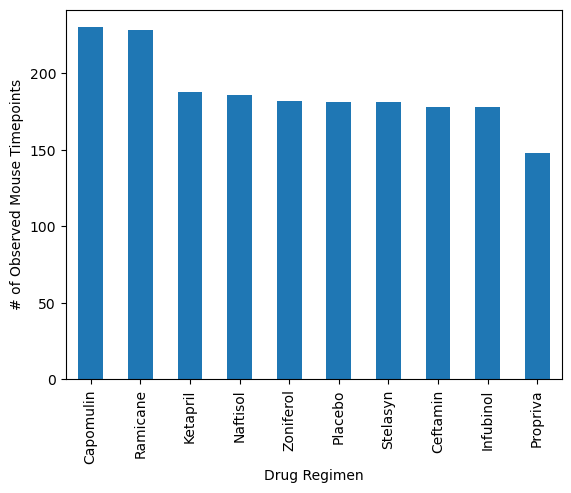

In [133]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_df = cleand_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_df.sort_values(ascending=False).plot(kind="bar", xlabel="Drug Regimen", 
                                          ylabel= "# of Observed Mouse Timepoints")
plt.show()


In [134]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plot_df = cleand_df.groupby(["Drug Regimen"]).count()
x_axis = np.arange(len(plot_df))
tick_locations = [value for value in x_axis]
drug_names = cleand_df['Drug Regimen'].unique()


plt.bar(x_axis, plot_df["Mouse ID"].sort_values(ascending=False), color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_names, rotation="vertical")
plt.show()

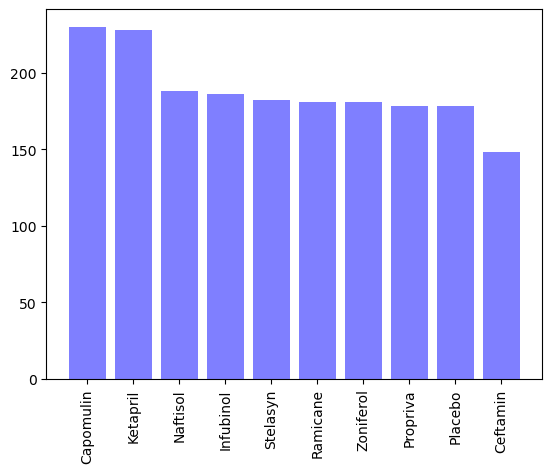

Sex
Male      958
Female    922
Name: count, dtype: int64


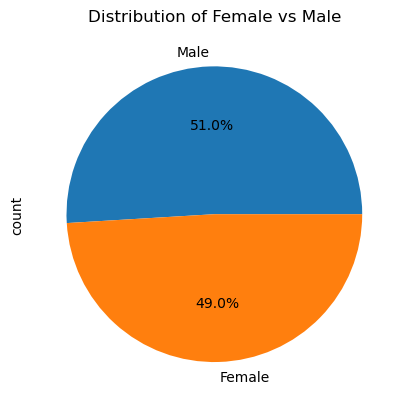

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = cleand_df['Sex'].value_counts()
print(sex_count)

sex_count.plot(kind='pie', autopct='%1.1f%%', startangle=0)
plt.title("Distribution of Female vs Male")
plt.show()

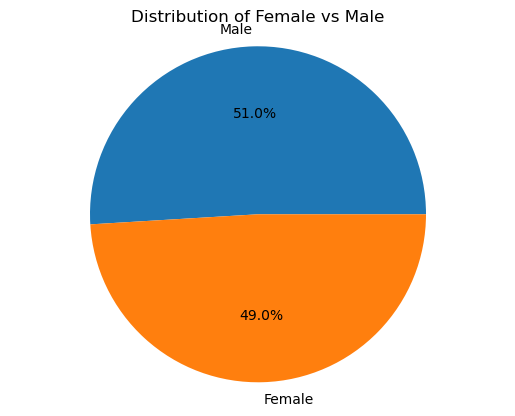

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_count.index.tolist()
sizes = sex_count.tolist()
#print(sizes)
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=0)
plt.title('Distribution of Female vs Male')
plt.axis('equal') 
plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(cleand_df.groupby("Mouse ID")["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df = pd.merge(max_timepoint_df, cleand_df, on=["Mouse ID", "Timepoint"], how="left")
max_timepoint_df.head()

    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


Capomulin's Potential Outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's Potential Outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Potential Outliers : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Potential Outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)


In [82]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]
treatment_tumor_dict = {}
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatment_names:
    # Locate the rows which contain mice on each drug and get the tumor volume
    tumor_vol = max_timepoint_df.loc[max_timepoint_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    treatment_tumor_dict[treatment] = tumor_vol.tolist()
   
    # add subset 
    quartiles = tumor_vol.quantile([0.25,0.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    tumor_vol = pd.DataFrame(tumor_vol)
    outliers = tumor_vol.loc[(tumor_vol["Tumor Volume (mm3)"] < lower_bound) | (tumor_vol["Tumor Volume (mm3)"] > upper_bound)]
    print(f"{treatment}'s Potential Outliers : {outliers['Tumor Volume (mm3)']}")
    
#pd.DataFrame(treatment_tumor_dict )

Capomulin's Potential Outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's Potential Outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Potential Outliers : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Potential Outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)


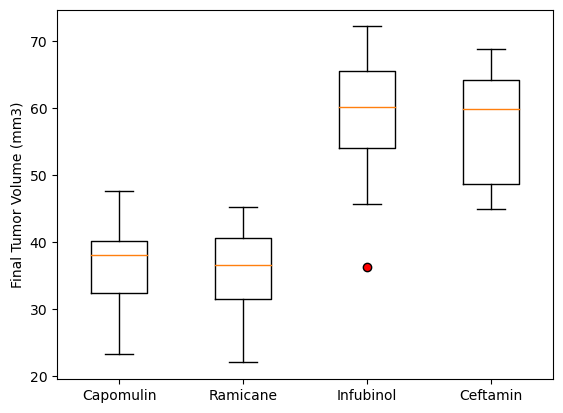

In [91]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
#for treatment in treatment_names:
    
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(treatment_tumor_dict.values(),flierprops = dict(markerfacecolor = "red"))

plt.xticks([1, 2, 3,4], treatment_names)
plt.show()

## Line and Scatter Plots

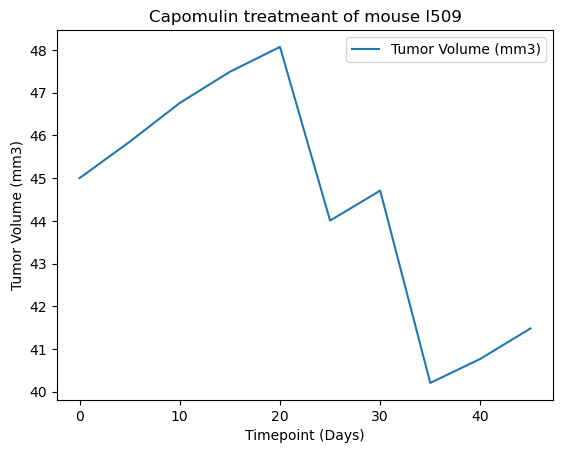

In [98]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_df = cleand_df.loc[cleand_df["Mouse ID"] == "l509",:]
l509_df.plot(kind="line",x="Timepoint", y = "Tumor Volume (mm3)",
             xlabel='Timepoint (Days)',ylabel='Tumor Volume (mm3)')
plt.title('Capomulin treatmeant of mouse l509')
plt.show()

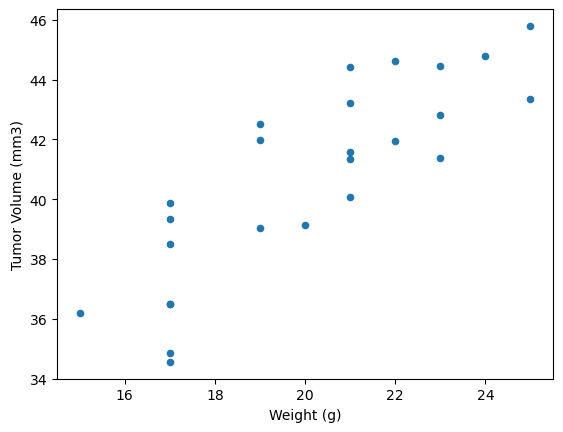

In [104]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = cleand_df.loc[cleand_df["Drug Regimen"] == "Capomulin",:]
capavg = cap_df.groupby(['Mouse ID']).mean(numeric_only=True)
capavg.plot(kind='scatter', x="Weight (g)", y="Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

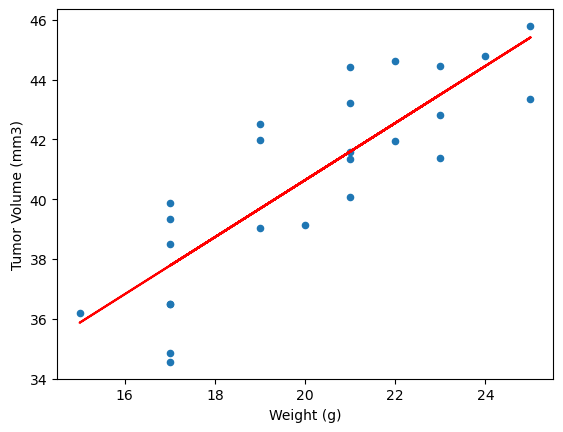

The correlation between mouse weight and the average tumor volume is 0.84


In [112]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capavg['Weight (g)']
y_values = capavg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
capavg.plot(kind='scatter', x="Weight (g)", y="Tumor Volume (mm3)")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")